###Data Analysis lab 1

# Полезные ссылки:
http://course.omgtu.ru/wp-content/uploads/2021/04/5_%D0%9B%D0%B8%D0%BD_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.pdf

https://habr.com/ru/company/ruvds/blog/494720/

# Прошлые лабы для скатывания методов:
Лаба1: https://colab.research.google.com/drive/1JTqud4yQwazyDKLTQo7NTuFiT83C8xvU?usp=sharing#scrollTo=3lgp9ev_EAz5 \
Лаба2: https://colab.research.google.com/drive/1UH1i5roCNSzF3dXXfgqC6-kKdmD-9s9w#scrollTo=mdneWBFd8zbs \
Лаба3: https://colab.research.google.com/drive/1zOrweDE_DVOmsfAVdboUMQhS3ahTbw2Y#scrollTo=HLeePEzfblgg

# Проверка работы библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import math

plt.rcParams["figure.figsize"] = (18, 9)

np.set_printoptions(suppress=True)

train_path = "sample_data/train.csv"
test_path = "sample_data/test_x.csv"
# train_path = '/kaggle/input/andan-2022-autumn-lab-1/train.csv'
# test_path = '/kaggle/input/andan-2022-autumn-lab-1/test_x.csv'

In [ ]:
train_data = pd.read_csv(train_path)
train_data.head(10)


,user_id,org_id,rating,ts,user_city,org_city,average_bill,rating_org,rubrics,food_delivery,...,call_button,wheelchair_accessible,table_games,vinotheque,cakes_for_different_occasions,accepted_credit_cards,kalyan,teahouse,bread_from_tandoor,handmade_goods
0,12182789761588196310,11946401375069641937,4.0,677,msk,msk,1500.0,3.883212,Ресторан,1,...,0,0,0,0,0,0,0,0,0,0
1,2796544982129273287,5545859981678495568,5.0,577,msk,msk,1000.0,4.495379,Ресторан,1,...,0,0,0,0,0,0,0,0,0,0
2,10546824832088319728,3451485117888180206,4.0,716,msk,msk,500.0,4.576063,Кафе,1,...,0,0,0,0,0,0,0,0,0,0
3,9967742981458207920,9490041040735762889,3.0,639,spb,spb,1000.0,3.775701,Кафе,1,...,0,0,0,0,0,0,0,0,0,0
4,11046819495825038093,5234254278902729372,5.0,669,msk,msk,500.0,4.187500,Пиццерия,1,...,0,1,0,0,0,0,0,0,0,0
5,14296765830420161051,1442344825802528328,3.0,1186,msk,msk,NaN,4.417529,Кафе,0,...,0,0,0,0,0,0,0,0,0,0
6,12923831187689997640,14124784519790591333,5.0,1191,msk,msk,500.0,4.790698,Кафе,1,...,0,0,0,0,0,1,0,1,0,0
7,10057920589481344279,6755669075968379218,5.0,458,msk,msk,1500.0,4.253944,Ресторан,1,...,0,0,0,0,0,0,0,0,0,0
8,9975191723608346225,8524317870173887334,4.0,475,msk,msk,500.0,4.051370,Быстрое питание,1,...,0,0,0,0,0,0,0,0,0,0
9,4034027593745622590,4403059393561217597,5.0,958,msk,msk,NaN,4.521127,"Бар, паб",1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data = pd.read_csv(train_path)
for i in train_data:
    print(i, end = ', ')
print()
for i in train_data[3:]: # don't work
    print(i, end = ', ')
print()

# train_data['rating_org'] = train_data.rating_org
# train_data[3:5]

train_rating_name = 'rating_org'
train_rating_data = train_data.pop(train_rating_name)
for i in train_data['rating'][:10]:
    print(i, end = ', ')
print()

user_id, org_id, rating, ts, user_city, org_city, average_bill, rating_org, rubrics, food_delivery, breakfast, takeaway, summer_terrace, wi_fi, business_lunch, payment_by_credit_card, coffee_to_go, closed_for_quarantine, online_takeaway, karaoke, special_menu, sports_broadcasts, food_court1, craft_beer, projector, gift_certificate, wheelchair_access, automatic_door, food_product_delivery, car_park, parking_disabled, toilet_for_disabled, promotions, cafe, minimum_order, free_delivery, self_service_kiosks, has_restaurant, air_conditioning, pets, elevator, has_bar, internet access, privilege_tickets, organic_food, vip_zone, hall_capacity, face_control, show_program, music, chillout, dancefloor, dress_code, billiards, strip, elevator_wheelchair_accessible, ramp, around_the_clock_work1, pickup, farm_products, delivery, coffee_shop, call_button, wheelchair_accessible, table_games, vinotheque, cakes_for_different_occasions, accepted_credit_cards, kalyan, teahouse, bread_from_tandoor, handmade

# Попробуем sklearn.linear_model для многомерных пространств

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html \
https://scikit-learn.org/stable/modules/linear_model.html

In [ ]:
from sklearn.linear_model import LinearRegression
# X = np.array([[1, np.nan], [1, 2], [2, 2], [2, 3]]) # LinearRegression() don't work
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]]) #
# X = np.array([[1, 1, 'str'], [1, 2, 'abc'], [2, 2, 'qwe'], [2, 3, '123']]) # LinearRegression() don't work
# y = np.dot(X, np.array([1, 2])) + 3
y = X @ np.array([1, 2]) + 3 
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.predict(np.array([[3, 5]]))

array([16.])

# Поиск ненужных ячеек 
Очевидно, что в test_x.csv нет столбца rating_org (всего 71 столбец), который есть в train.csv (всего 72 столбца). Его и надо подобрать.
Уберем лишние столбцы, которые никак не влияют на рейтинг. Очевидно, что столбцы user_id и org_id лишние в формуле. Также не будем смотреть все дальнейшие столбцы после food_dilivery (включительно), все они принимают булевское значение, поэтому будем считать, что они влияют на рейтинг.

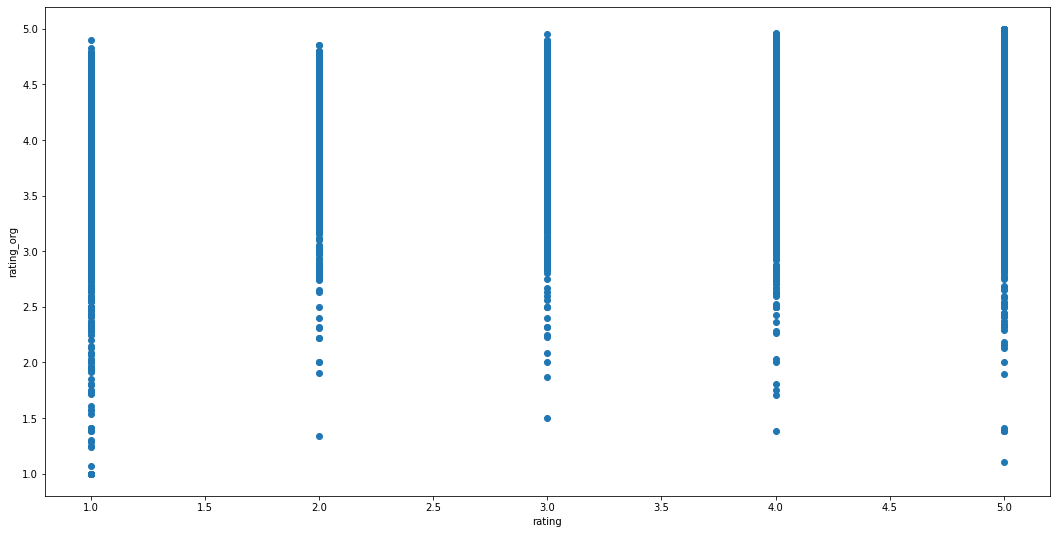

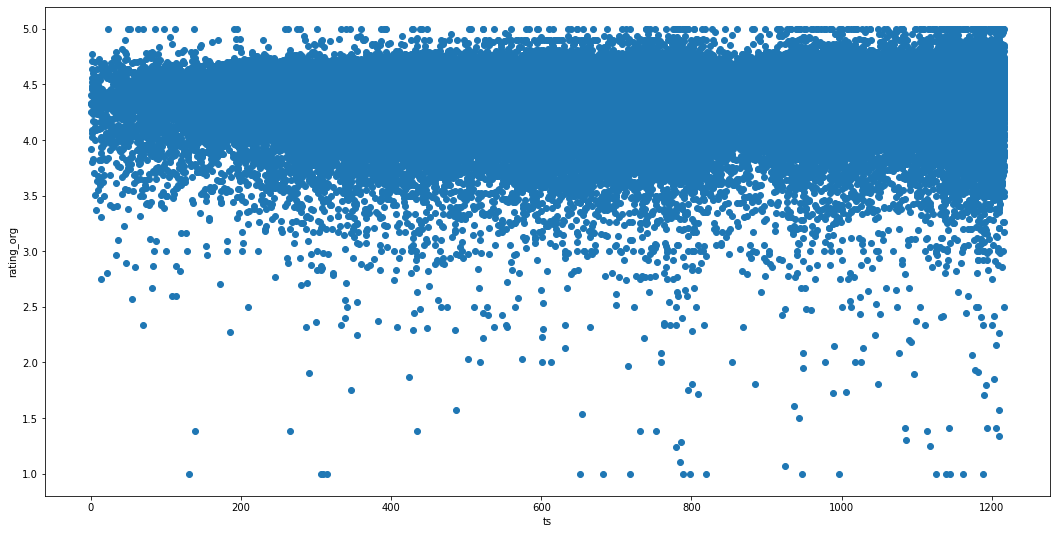

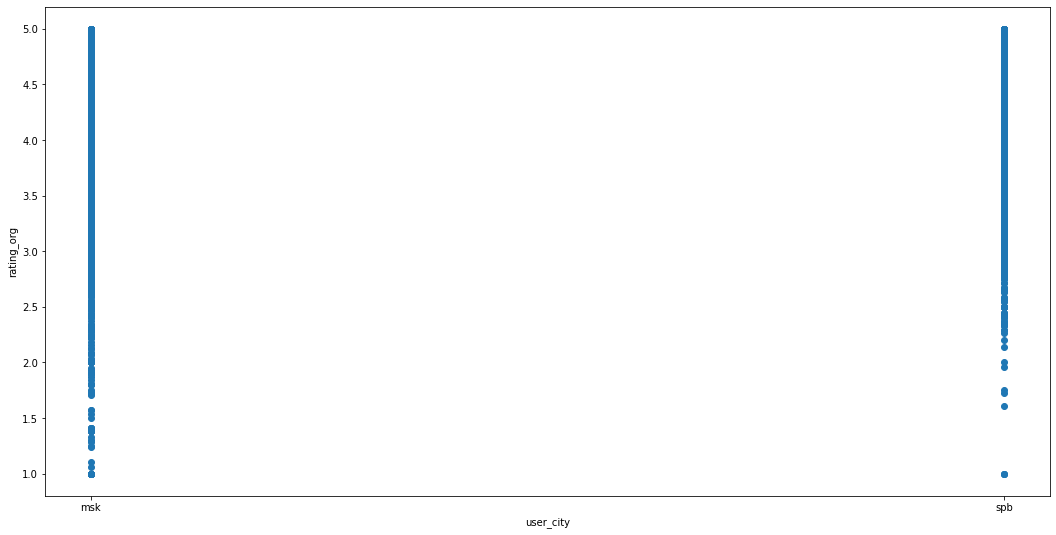

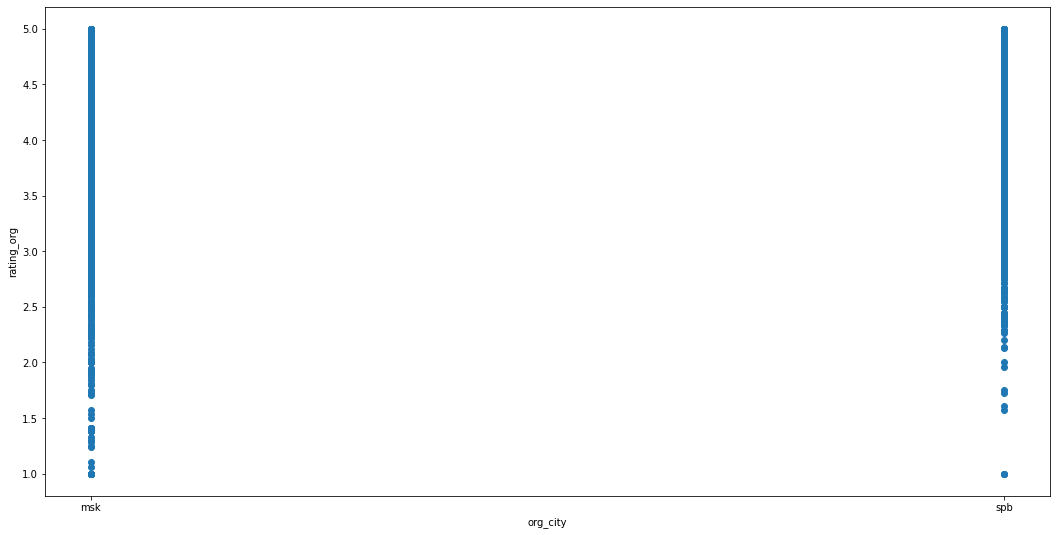

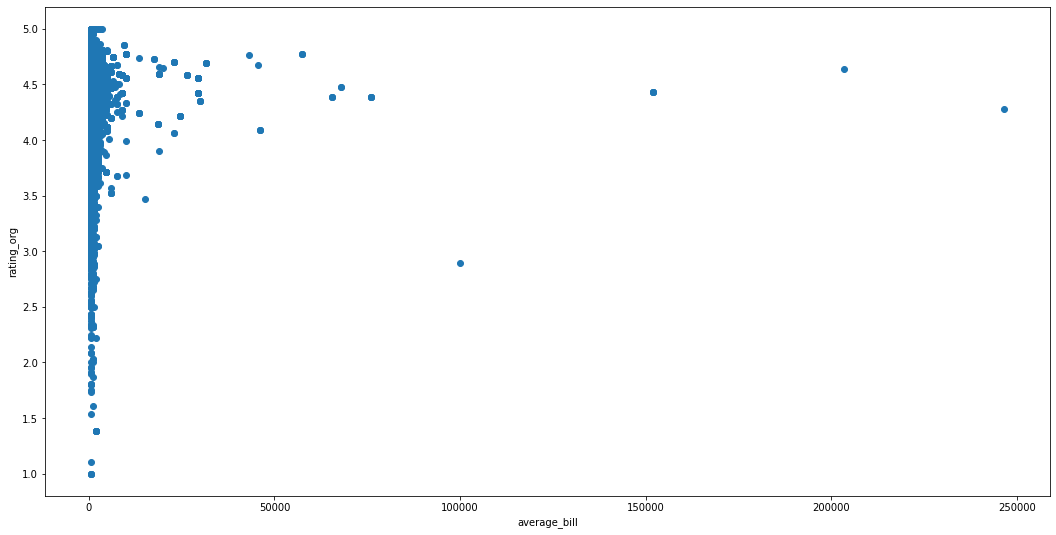

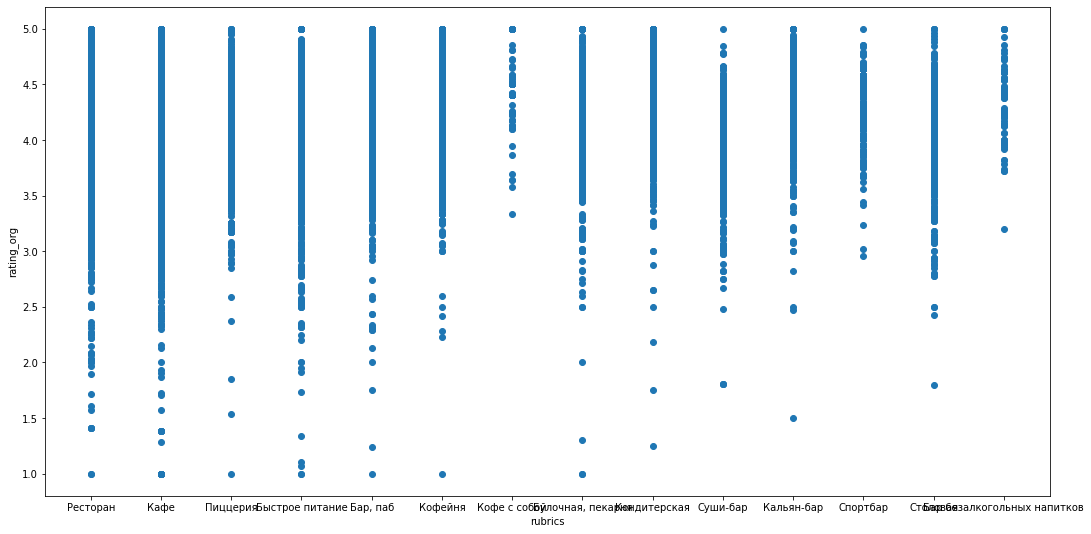

In [ ]:
def showPlot(X, Y, xlabel, ylabel):
    plt.plot(X, Y, "o")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

train_data = pd.read_csv("sample_data/train.csv")
train_rating_name = 'rating_org'
train_rating_data = train_data.pop(train_rating_name)

# for (columnName, columnData) in train_data.iteritems():
for columnName in train_data:
    if columnName == 'food_delivery':
        break
    if columnName in [train_rating_name, 'user_id', 'org_id']: 
        continue
    columnData = train_data[columnName]
    showPlot(np.array(columnData), np.array(train_rating_data), columnName, train_rating_name)

In [ ]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
train_rubrics_set = set()
for i in train_data['rubrics']:
    train_rubrics_set.add(i)
print(train_rubrics_set)

test_rubrics_set = set()
for i in test_data['rubrics']:
    test_rubrics_set.add(i)
print(test_rubrics_set)
print(train_rubrics_set.difference(test_rubrics_set))

{'Спортбар', 'Столовая', 'Быстрое питание', 'Пиццерия', 'Суши-бар', 'Кафе', 'Кофейня', 'Кондитерская', 'Бар безалкогольных напитков', 'Кальян-бар', 'Кофе с собой', 'Булочная, пекарня', 'Бар, паб', 'Ресторан'}
{'Спортбар', 'Столовая', 'Быстрое питание', 'Пиццерия', 'Суши-бар', 'Кафе', 'Кофейня', 'Бар, паб', 'Кондитерская', 'Бар безалкогольных напитков', 'Кальян-бар', 'Кофе с собой', 'Булочная, пекарня', 'Ресторан'}
set()


Есть определенные проблемы со столбцами rubrics, org_city и user_city, которые хранят в себе строку, а не число. Если с последними двумя немного проще: можно перевести в булевское значение (но нужны ли нам сразу оба столбца?); то с rubrics всё сложнее - состояний больше 2. \\
Также известно, что в тестах нет новых объектов для столбца rubrics, которых не было в тренировке, поэтому нет необходимости убирать этот столбец из формулы. Можно придумать такую функцию, что сможет взять из столбца rubrics строку и выдать подходящее транзитивное число. \\
Также можно добавить больше размерностей, и отвечать на вопросы "Является ли эта организация ... (Рестораном, кафе и т.д.)?". Это я и реализую, регрессия сама разберется с коэффициентами.

Очень вероятно, что столбец rating лишний в линейной регрессии и его не стоит учитывать.

По графику трудно определить, влияет ли как-то столбец ts на рейтинг или нет.
Стоит оставить в качестве одной из размерностей в формуле.

Заметим проблему со столбцом average_bill (см. картинку) - пропущены некоторые данные, и в таблице обозначены как NaN. Как известно - функция LinearRegression() не допускает пропусков, поэтому надо либо дополнять пробелы своими данными, либо просто удалять эти строки, попробуем оба варианта. К тому же по графику можно заметить аномалии. Возможно, позже попробуем варианты линейной регрессии с аномалиями и без.

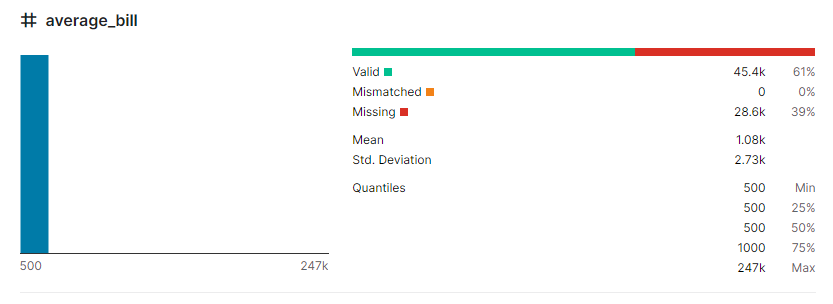

In [ ]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [ ]:
def count_avarage(data):
    count = 0
    sum = 0.0
    for i in data:
        if not np.isnan(i):
            sum += i
            count += 1
    return sum / count

average_bill = count_avarage(train_data['average_bill'])
print('average_bill:', average_bill)

def get_bill(val):
    return average_bill if np.isnan(val) else val

# def fill_nan_average_bill(data):
#     # global average_bill
#     k = 0
#     for i in data:
#         # if np.isnan(i):
#         #     data[k] = average_bill

#         data[k] = get_bill(i)
#         k += 1

# fill_nan_average_bill(train_data['average_bill'])

average_bill: 1075.891972795105


In [ ]:
train_rubrics_set = set()
for i in train_data['rubrics']:
    train_rubrics_set.add(i)

def rubrics_handler(s):
    return [1 if s == i else 0 for i in train_rubrics_set]

columns = train_data.columns
def line_handler(line):
    # global columns
    ma = []
    for name in columns:
        # print(name, ma)
        if name in ['rating_org', 'user_id', 'org_id']: # ignore
            continue
        elif name in ['average_bill']:
            ma += [get_bill(line[name])]
        elif name in ['rubrics']:
            ma += rubrics_handler(line[name])
        elif name in ['org_city', 'user_city']:
            ma += [0 if line[name] == 'msk' else 1]
        else:
            ma += [line[name]]
    return ma


from sklearn.linear_model import LinearRegression
def getRegression(data, rating_org):
    X = []
    # columns = train_data.columns
    for i in train_data.index:
        line = train_data.iloc[i]
        X += [line_handler(line)]
        # print(X)

    print(X[0])
    X = np.array(X)
    print(X[0])
    return LinearRegression().fit(X, rating_org)

reg = getRegression(train_data, train_data['rating_org'])

[4.0, 677, 0, 0, 1500.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[   4.  677.    0.    0. 1500.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    1.    0.    0.    0.    1.    1.    1.    0.    1.
    1.    0.    0.    1.    1.    0.    1.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]


In [ ]:
ma = reg.predict([line_handler(train_data.iloc[i]) for i in test_data.index])

from itertools import count
# rating = pd.DataFrame(zip(count(0), np.array(ma)), columns=['id', 'rating_org'])
rating = pd.DataFrame(np.array(ma), columns=['rating_org'])



In [ ]:
rating = pd.DataFrame(zip(count(0), np.array(ma)), columns=['id', 'rating_org'])
# rating = pd.DataFrame(np.array(ma), columns=['id','rating_org'])
rating.to_csv('saved_ratings.csv', index=False)
print(rating)

          id  rating_org
0          0    4.199636
1          1    4.497439
2          2    4.310221
3          3    4.296607
4          4    4.235313
...      ...         ...
24660  24660    4.305946
24661  24661    4.456920
24662  24662    4.235828
24663  24663    4.139307
24664  24664    4.425904

[24665 rows x 2 columns]
